In [1]:
# This is trying to find the issues with the BP2 and BP3 distributions
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [2]:
file = uproot.open('/vols/cms/emc21/idmStudy/MadGraph_files/distributions/h2h2lPlM_lem/BP3/h2h2lPlM_lem_BP3/Events/run_01/unweighted_events.root')
tree = file['LHEF']
tree = tree['Particle']
print(tree.keys())
data = tree.arrays(['Particle.PID', 'Particle.Px','Particle.Py', 'Particle.Pz', 'Particle.PT', 'Particle.E', 'Particle.Eta', 'Particle.Status'], library='ak')

['Particle.fUniqueID', 'Particle.fBits', 'Particle.PID', 'Particle.Status', 'Particle.Mother1', 'Particle.Mother2', 'Particle.ColorLine1', 'Particle.ColorLine2', 'Particle.Px', 'Particle.Py', 'Particle.Pz', 'Particle.E', 'Particle.M', 'Particle.PT', 'Particle.Eta', 'Particle.Phi', 'Particle.Rapidity', 'Particle.LifeTime', 'Particle.Spin']


In [3]:
def H_PT(data): 
    #mean = H_data['Particle.PT'].mean()
    #std = H_data['Particle.PT'].std()
    H_data = data[data['Particle.PID'] == 35]
    nbins = 300 
    plt.figure(figsize=(8,6))
    plt.tight_layout()
    #plt.hist(H_data['Particle.PT'], bins=nbins, label=f'$\mu={mean:0.2f}$, $\sigma={std:0.2f}$')
    plt.hist(ak.flatten(H_data['Particle.PT']), bins=nbins)
    plt.title(f'H PTs')
    plt.xlabel(f'PT (GeV)')
    plt.ylabel(f'Counts')
    plt.xlim((0,250))

The number of events with PT of both Hs over 100 = 7338
[-1, -1, 2, 1, 1, 1, 1]
[1, -1, 36, 35, 35, -13, 13]
The number of events here that had an intermediate A = 5584
The percentage of events that have an intermediate A = 0.7609702916325974
The number of events here that had an intermediate Z = 1734
The percentage of events that have an intermediate Z = 0.23630417007358953
The number of events with no intermediate particle = 20
Percentage of events here that don"t have an intermediate particle = 0.002725538293813028


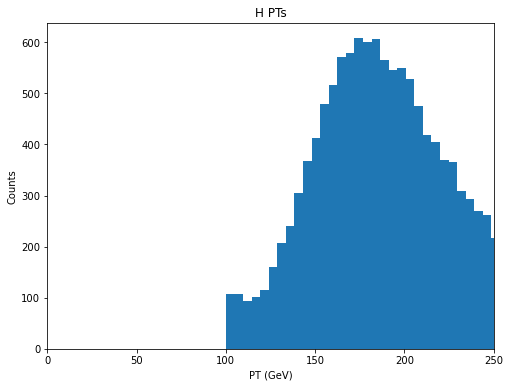

In [4]:
# Want only the events that have both Hs with over 100 PT
# This picks out the events that have all the Hs with over 100 PT
evs_over_100 = data[ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] > 100, axis=1)]
# Can check this with above by checking the length of it
print(f'The number of events with PT of both Hs over 100 = {len(evs_over_100)}')

# What particles does it have
print(evs_over_100[0]['Particle.Status'])
print(evs_over_100[0]['Particle.PID'])

# So this event had an intermediate A -> Do they all for this subset?
evs_over_100_wA = evs_over_100[ak.any(evs_over_100['Particle.PID'] == 36, axis=1)]
print(f'The number of events here that had an intermediate A = {len(evs_over_100_wA)}')
# So a lot of them do include an A, but not all of them...
print(f'The percentage of events that have an intermediate A = {len(evs_over_100_wA)/ len(evs_over_100)}')

evs_over_100_wZ = evs_over_100[ak.any(evs_over_100['Particle.PID'] == 23, axis=1)]
print(f'The number of events here that had an intermediate Z = {len(evs_over_100_wZ)}')
# So a lot of them do include an A, but not all of them...
print(f'The percentage of events that have an intermediate Z = {len(evs_over_100_wZ)/ len(evs_over_100)}')

# How many of these have no intermediate particles
evs_over_too_no_int = evs_over_100[ak.all(evs_over_100['Particle.Status'] != 2, axis=1)]
print(f'The number of events with no intermediate particle = {len(evs_over_too_no_int)}')
print(f'Percentage of events here that don"t have an intermediate particle = {len(evs_over_too_no_int) / len(evs_over_100)}')

H_PT(evs_over_100)

The number of events with PT of both Hs under 100 = 1439
[-1, -1, 2, 1, 1, 1, 1]
[2, -2, 23, 35, 35, -13, 13]
The number of events here that had an intermediate A = 0
The percentage of events that have an intermediate A = 0.0
The number of events here that had an intermediate Z = 1427
The percentage of events that have an intermediate Z = 0.9916608756080612
The number of events with no intermediate particle = 12
Percentage of events here that don"t have an intermediate particle = 0.008339124391938846


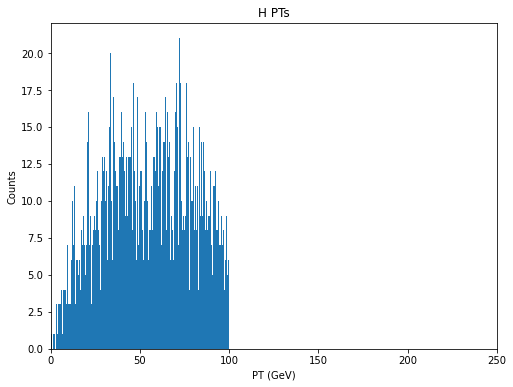

In [5]:
# Let's do something similar but for the events where the PT<100
evs_under_100 = data[ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] < 100, axis=1)]
# Can check this with above by checking the length of it
print(f'The number of events with PT of both Hs under 100 = {len(evs_under_100)}')

# What particles does it have
print(evs_under_100[0]['Particle.Status'])
print(evs_under_100[0]['Particle.PID'])

# So this event had an intermediate Z, not an A -> true for them all?
evs_under_100_wA = evs_under_100[ak.any(evs_under_100['Particle.PID'] == 36, axis=1)]
print(f'The number of events here that had an intermediate A = {len(evs_under_100_wA)}')
# So nearly all of them include a Z, this might be what's messing up the dists
print(f'The percentage of events that have an intermediate A = {len(evs_under_100_wA)/ len(evs_under_100)}')


evs_under_100_wZ = evs_under_100[ak.any(evs_under_100['Particle.PID'] == 23, axis=1)]
print(f'The number of events here that had an intermediate Z = {len(evs_under_100_wZ)}')
# So nearly all of them include a Z, this might be what's messing up the dists
print(f'The percentage of events that have an intermediate Z = {len(evs_under_100_wZ)/ len(evs_under_100)}')

# How many of these have no intermediate particles
evs_under_too_no_int = evs_under_100[ak.all(evs_under_100['Particle.Status'] != 2, axis=1)]
print(f'The number of events with no intermediate particle = {len(evs_under_too_no_int)}')
print(f'Percentage of events here that don"t have an intermediate particle = {len(evs_under_too_no_int) / len(evs_under_100)}')


H_PT(evs_under_100)

Print number of events with 1 H above 100 PT and 1 below = 1223
Number of these with an intermediate Z = 1205
Percentage of evs that have an intermediate Z = 0.9852820932134096
Percentage of evs that have an intermediate A = 0.0
[[23], [], [23], [23], [23], [23], [23], ... 23], [23], [23], [23], [23], [23], [23]]
dict_keys([23])
dict_values([1205])
[]


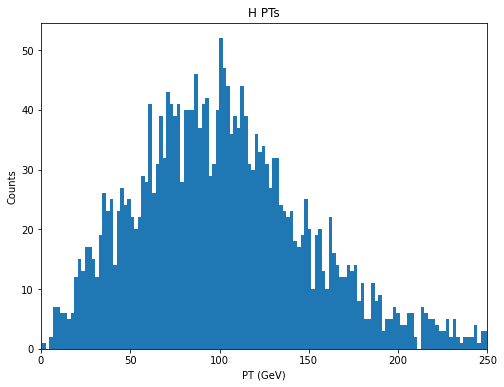

In [6]:
# Now find events with 1 H above and 1 below
# Do this by getting truth array of events with 
# both Hs above 100 eg [True, False, False]
# Then for both below [False, False, True]
# Then add them to get [True, False, True]
# Then invert it to get the events with 1 above and 1 below: [False, True, False]
mask1 = ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] > 100, axis=1)
mask2 = ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] < 100, axis=1)
mask = np.invert(mask1 + mask2)
ev_split = data[mask]
print(f'Print number of events with 1 H above 100 PT and 1 below = {len(ev_split)}')

H_PT(ev_split)
# So these are quite evenly distributited 

# Let's check how many have intermediate A or Z
ev_split_Z = ev_split[ak.any(ev_split['Particle.PID'] == 23, axis=1)]
print(f'Number of these with an intermediate Z = {len(ev_split_Z)}')
print(f'Percentage of evs that have an intermediate Z = {len(ev_split_Z) / len(ev_split)}')

ev_split_A = ev_split[ak.any(ev_split['Particle.PID'] == 36, axis=1)]
print(f'Percentage of evs that have an intermediate A = {len(ev_split_A) / len(ev_split)}')

# So nearly all of these have a Z and not an A, what do the rest have though?
# Get all the intermediate particles 
inters = ev_split[ev_split['Particle.Status'] == 2]
print(inters['Particle.PID'])
# 
from collections import Counter
inter_pid = list(ak.flatten(inters['Particle.PID']))
print(Counter(inter_pid).keys()) # equals to list(set(inter_pid))
print(Counter(inter_pid).values()) # counts the elements' frequency
# So it seems like the others just don't have an intermediate particle here
# Maybe they're super offshell?

# Let's find any events that aren't a Z
ev_split_nZ = ev_split[ak.any((ev_split['Particle.PID'] != 23) & (ev_split['Particle.Status'] == 2), axis=1)]
print(ev_split_nZ)


The number of events with 1 H above 100 PT and 1 below with no intermediate particle = 18
Percentage of events here that don"t have an intermediate particle = 0.014717906786590351


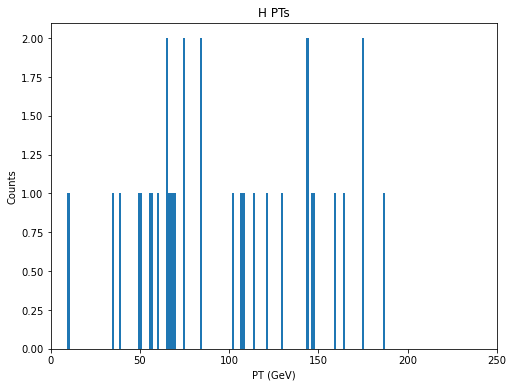

In [7]:
# How many of these events DON'T specify an intermediate particle?
evs_no_int = ev_split[ak.all(ev_split['Particle.Status'] != 2, axis=1)]
print(f'The number of events with 1 H above 100 PT and 1 below with no intermediate particle = {len(evs_no_int)}')
print(f'Percentage of events here that don"t have an intermediate particle = {len(evs_no_int) / len(ev_split)}')

# So these are the remaining events. Plot of their H PT
H_PT(evs_no_int)

In [8]:
print(evs_no_int)


[{'Particle.PID': [-1, 1, 35, 35, -11, 11], ... -1, -1, 1, 1, 1, 1]}]


## To summarise:
# For BP2:
There are 8336 events with both H having over 100 PT: \
Out of these events, 7226 (87%) have an intermediate A particle, 1094 have an intermediate Z (13%) and 16 do not specifiy an intermediate particle at all \

There are 895 with both H having under 100 PT: \
889 of these have an intermediate Z, none have an intermediate A, and 6 do not specify an intermediate particle. \

There are 769 with an H with PT above 100 and 1 below: \
755 of these have an intermediate Z, none have an intermediate A, and 14 do not specify and intermediate particle. \


# For BP3:
There are 7338 events with both H having over 100 PT: \
Out of these events, 5584 have an intermediate A particle, 1734 have an intermediate Z and 20 do not specifiy an intermediate particle at all \

There are 1439 with both H having under 100 PT: \
1427 of these have an intermediate Z, none have an intermediate A, and 12 do not specify an intermediate particle. \

There are 1223 with an H with PT above 100 and 1 below: \
1205 of these have an intermediate Z, none have an intermediate A, and 18 do not specify and intermediate particle. \



Let's see if there's anything interesting about the energies of the different cases:

In [9]:
evs_over_100 = data[ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] > 100, axis=1)]
evs_O100_E = ak.sum(evs_over_100['Particle.E'][:,:2], axis=1)

evs_under_100 = data[ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] < 100, axis=1)]
evs_U100_E = ak.sum(evs_under_100['Particle.E'][:,:2], axis=1)

mask1 = ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] > 100, axis=1)
mask2 = ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] < 100, axis=1)
mask = np.invert(mask1 + mask2)
ev_split = data[mask]
evs_split_E = ak.sum(ev_split['Particle.E'][:,:2], axis=1)

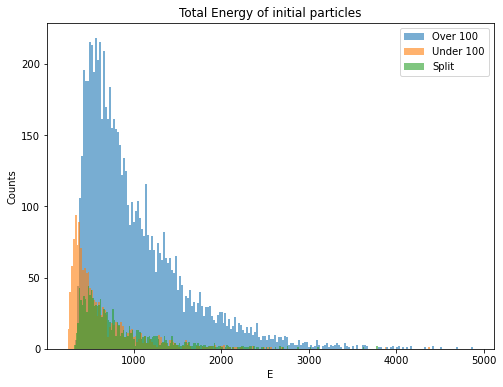

In [10]:
nbins = 200 
plt.figure(figsize=(8,6))
plt.tight_layout()
#plt.hist(H_data['Particle.PT'], bins=nbins, label=f'$\mu={mean:0.2f}$, $\sigma={std:0.2f}$')
plt.title(f'Total Energy of initial particles')
plt.xlabel(f'E')
plt.ylabel(f'Counts')

plt.hist(evs_O100_E, bins=nbins, label= 'Over 100', alpha=0.6)
plt.hist(evs_U100_E, bins=nbins, label= 'Under 100', alpha=0.6)
plt.hist(evs_split_E, bins=nbins, label= 'Split', alpha=0.6)

plt.legend()

The max diff for both Hs over 100 PT = 1.399998836859595e-07
The index of this is 2927
The max diff for both Hs under 100 PT = 8.300048648379743e-08
The max diff for 1 H above 100PT and 1 below = 8.899996828404255e-08


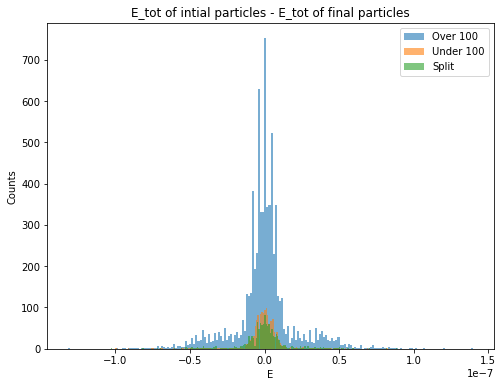

In [11]:
# Let's see if the energy is messing up somewhere from the initial states to 
# the final state
# For this I will do this in parts as well:
evs_over_100 = data[ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] > 100, axis=1)]
# Take out all the samples that are intermediate ones
evs_over_100 = evs_over_100[evs_over_100['Particle.Status'] != 2]
evs_O100_iE = ak.sum(evs_over_100['Particle.E'][:,:2], axis=1)
evs_O100_fE = ak.sum(evs_over_100['Particle.E'][:,2:], axis=1)
evs_O100_diffE = evs_O100_iE - evs_O100_fE

evs_under_100 = data[ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] < 100, axis=1)]
evs_under_100 = evs_under_100[evs_under_100['Particle.Status'] != 2]
evs_U100_iE = ak.sum(evs_under_100['Particle.E'][:,:2], axis=1)
evs_U100_fE = ak.sum(evs_under_100['Particle.E'][:,2:], axis=1)
evs_U100_diffE = evs_U100_iE - evs_U100_fE

mask1 = ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] > 100, axis=1)
mask2 = ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] < 100, axis=1)
mask = np.invert(mask1 + mask2)
ev_split = data[mask]
ev_split = ev_split[ev_split['Particle.Status'] != 2]
evs_split_iE = ak.sum(ev_split['Particle.E'][:,:2], axis=1)
evs_split_fE = ak.sum(ev_split['Particle.E'][:,2:], axis=1)
evs_split_diffE = evs_split_iE - evs_split_fE

print(f'The max diff for both Hs over 100 PT = {max(evs_O100_diffE)}')
print(f'The index of this is {ak.argmax(evs_O100_diffE)}')
print(f'The max diff for both Hs under 100 PT = {max(evs_U100_diffE)}')
print(f'The max diff for 1 H above 100PT and 1 below = {max(evs_split_diffE)}')


nbins = 200 
plt.figure(figsize=(8,6))
plt.tight_layout()
#plt.hist(H_data['Particle.PT'], bins=nbins, label=f'$\mu={mean:0.2f}$, $\sigma={std:0.2f}$')
plt.title(f'E_tot of intial particles - E_tot of final particles')
plt.xlabel(f'E')
plt.ylabel(f'Counts')

plt.hist(evs_O100_diffE, bins=nbins, label= 'Over 100', alpha=0.6)
plt.hist(evs_U100_diffE, bins=nbins, label= 'Under 100', alpha=0.6)
plt.hist(evs_split_diffE, bins=nbins, label= 'Split', alpha=0.6)

plt.legend()

# Distribution of the leptons for the 3 different classes:

In [12]:
def lepton_PT(data):
    lepton_data = data[(abs(data['Particle.PID']) == 11) | (abs(data['Particle.PID']) == 13)]
    nbins = 150
    plt.figure(figsize=(8,6))
    plt.tight_layout()
    #plt.hist(lepton_data['Particle.PT'], bins=nbins, label=f'$\mu={mean:0.2f}$, $\sigma={std:0.2f}$')
    plt.hist(ak.flatten(lepton_data['Particle.PT']), bins=nbins)
    plt.title(f'Lepton PT')
    plt.xlabel(f'PT (GeV)')
    plt.ylabel(f'Counts')
    plt.xlim((0, 200))

7338


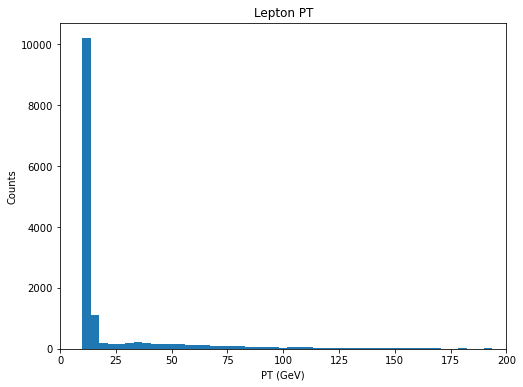

In [13]:
# First for events where the Hs both have over 100 PT 
print(len(evs_over_100))
lepton_PT(evs_over_100)

# So these are heavily peaked at a very low PT for some reason

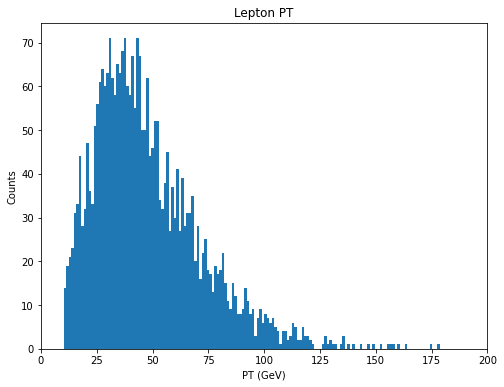

In [14]:
# For events where both the Hs have less than 100 PT
lepton_PT(evs_under_100)

# So these are distributed a lot more normally, there just aren't very many
# 

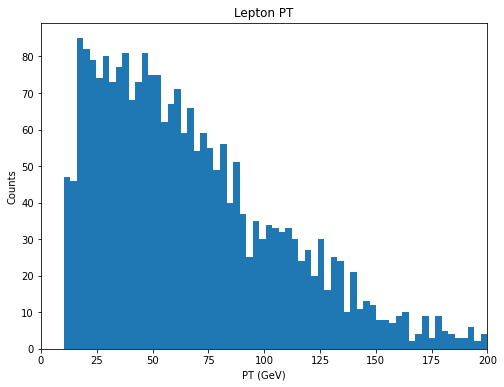

In [15]:
lepton_PT(ev_split)

# These are also distributed in a nice way, so doesn't look like anything is going wrong here
# Well not a lot at least is going wrong, unsure what happened on the far left.

## From the lepton plots:
It looks like that the events which are messing up are the one's with both Hs having over 100 PT, this also corresponds to most of the cases with an intermediate A. So it might actually be the fact that the intermediate A has a really small width which is causing this problem. /
Doing the same above but just for the events that have an intermediate A, with no cuts on the H PTs /

## Key point:
To be able to actually see the differenes in the distributions, we have to plot them using the same bins!
So follow the method below to do that 

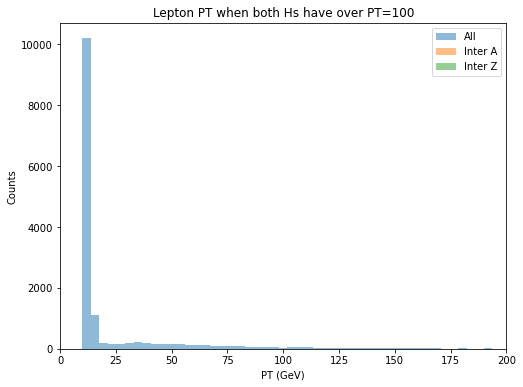

In [16]:
# This is the lepton data for all the events with both Hs having over 100 PT
lepton_data_1 = evs_over_100[(abs(evs_over_100['Particle.PID']) == 11) | (abs(evs_over_100['Particle.PID']) == 13)]

# This is the events with both H>100PT, but that also have an intermediate A
data_inter_A = evs_over_100[ak.any(evs_over_100[evs_over_100['Particle.PID'] == 36]['Particle.Status'] == 2, axis=1)]
lepton_data_2 = data_inter_A[(abs(data_inter_A['Particle.PID']) == 11) | (abs(data_inter_A['Particle.PID']) == 13)]

# Events with an intermediate Z:
data_inter_Z = evs_over_100[ak.any(evs_over_100[evs_over_100['Particle.PID'] == 23]['Particle.Status'] == 2, axis=1)]
lepton_data_3 = data_inter_Z[(abs(data_inter_Z['Particle.PID']) == 11) | (abs(data_inter_Z['Particle.PID']) == 13)]


nbins = 150
plt.figure(figsize=(8,6))
plt.tight_layout()
#plt.hist(lepton_data['Particle.PT'], bins=nbins, label=f'$\mu={mean:0.2f}$, $\sigma={std:0.2f}$')
_, bins, _ = plt.hist(ak.flatten(lepton_data_1['Particle.PT']), bins=nbins, alpha = 0.5, label= 'All')
_ = plt.hist(ak.flatten(lepton_data_2['Particle.PT']), bins=bins, alpha = 0.5, label= 'Inter A')
_ = plt.hist(ak.flatten(lepton_data_3['Particle.PT']), bins=bins, alpha = 0.5, label= 'Inter Z')
plt.title(f'Lepton PT when both Hs have over PT=100')
plt.xlabel(f'PT (GeV)')
plt.ylabel(f'Counts')
plt.xlim((0, 200))
plt.legend()

10000
10000


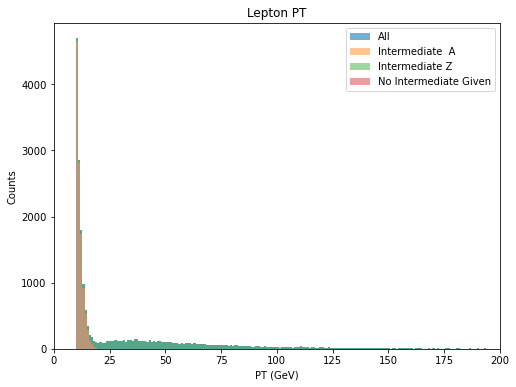

In [17]:
# How about we do the same process but use all of the data rather than just the ones
# that have both Hs with over 100PT
# This is the lepton data for all the events with both Hs having over 100 PT
lepton_data_1 = data[(abs(data['Particle.PID']) == 11) | (abs(data['Particle.PID']) == 13)]

# This is the events with both H>100PT, but that also have an intermediate A
data_inter_A = data[ak.any(data[data['Particle.PID'] == 36]['Particle.Status'] == 2, axis=1)]
lepton_data_2 = data_inter_A[(abs(data_inter_A['Particle.PID']) == 11) | (abs(data_inter_A['Particle.PID']) == 13)]

# Events with an intermediate Z:
data_inter_Z = data[ak.any(data[data['Particle.PID'] == 23]['Particle.Status'] == 2, axis=1)]
lepton_data_3 = data_inter_Z[(abs(data_inter_Z['Particle.PID']) == 11) | (abs(data_inter_Z['Particle.PID']) == 13)]

# Events that have no intermediate particle specified
data_no_inter = data[ak.all(data['Particle.Status'] != 2, axis=1)]
lepton_data_4 = data_no_inter[(abs(data_no_inter['Particle.PID']) == 11) | (abs(data_no_inter['Particle.PID']) == 13)]

print(len(lepton_data_1))
print(len(lepton_data_2)+ len(lepton_data_3)+ len(lepton_data_4))

nbins = 600
plt.figure(figsize=(8,6))
plt.tight_layout()
_, bins, _ = plt.hist(ak.flatten(lepton_data_1['Particle.PT']), bins=nbins, alpha = 0.6, label= 'All')
# I want to stack all of the other histograms so it matches the total
other_lepton_data = (ak.flatten(lepton_data_2['Particle.PT']), ak.flatten(lepton_data_3['Particle.PT']), ak.flatten(lepton_data_4['Particle.PT']))
labels = ('Intermediate  A', 'Intermediate Z', 'No Intermediate Given')
_ = plt.hist(other_lepton_data, bins= bins, alpha = 0.45, stacked = True, label= labels)
# _ = plt.hist(ak.flatten(lepton_data_2['Particle.PT']), bins=bins, alpha = 0.5, label= 'Intermediate A')
# _ = plt.hist(ak.flatten(lepton_data_3['Particle.PT']), bins=bins, alpha = 0.5, label= 'Intermediate Z')
# _ = plt.hist(ak.flatten(lepton_data_4['Particle.PT']), bins=bins, alpha = 0.5, label= 'No intermediate given')
plt.title(f'Lepton PT')
plt.xlabel(f'PT (GeV)')
plt.ylabel(f'Counts')
plt.xlim((0, 200))
plt.legend()

## Spike is coming from the events with an intermediate A

7338


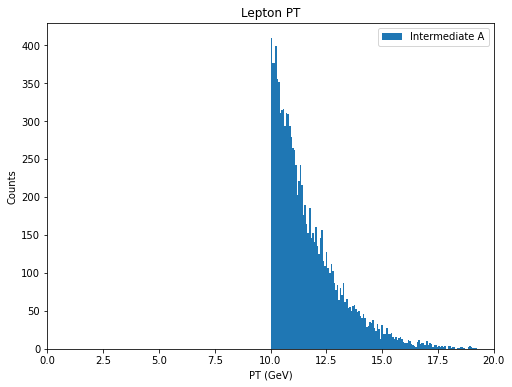

In [18]:
# Let's plot just the ones that have an intermediate A on their own axis
# This is the events with both H>100PT, but that also have an intermediate A
data_inter_A = data[ak.any(data[data['Particle.PID'] == 36]['Particle.Status'] == 2, axis=1)]
print(len(evs_over_100))
lepton_data = data_inter_A[(abs(data_inter_A['Particle.PID']) == 11) | (abs(data_inter_A['Particle.PID']) == 13)]

nbins = 150
plt.figure(figsize=(8,6))
plt.tight_layout()
#plt.hist(lepton_data['Particle.PT'], bins=nbins, label=f'$\mu={mean:0.2f}$, $\sigma={std:0.2f}$')
plt.hist(ak.flatten(lepton_data['Particle.PT']), bins=nbins, label='Intermediate A')
plt.title(f'Lepton PT')
plt.xlabel(f'PT (GeV)')
plt.ylabel(f'Counts')
plt.xlim((0, 20))
plt.legend()
# So it seems that the leptons have such a low PT that they're being cut off at 10GeV minimum
# This 

7338
0


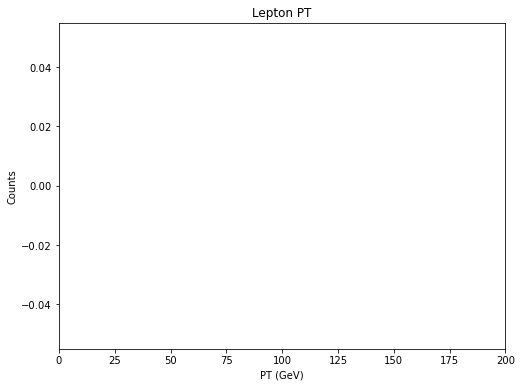

In [19]:
data_inter_Z = evs_over_100[ak.any(evs_over_100[evs_over_100['Particle.PID'] == 23]['Particle.Status'] == 2, axis=1)]
print(len(evs_over_100))
print(len(data_inter_Z))
lepton_PT(data_inter_Z)

In [20]:
5584 + 1734

7318

In [21]:
evs_over_100[evs_over_100['Particle.PID'] == 36]['Particle.Status']

<Array [[], [], [], [], ... [], [], [], []] type='7338 * var * int32'>

In [22]:
from collections import Counter
inter_pid = list(ak.flatten(evs_over_100[evs_over_100['Particle.PID'] == 36]['Particle.Status']))
print(Counter(inter_pid).keys()) # equals to list(set(inter_pid))
print(Counter(inter_pid).values()) # counts the elements' frequency

dict_keys([])
dict_values([])


## From the lepton plots:
It looks like that the events which are messing up are the one's with both Hs having over 100 PT, this also corresponds to most of the cases with an intermediate A. So it might actually be the fact that the intermediate A has a really small width which is causing this problem. /
Doing the same above but just for the events that have an intermediate A, with no cuts on the H PTs:

In [23]:
data_inter_A = data[ak.any(data[data['Particle.PID'] == 36]['Particle.Status'] == 2, axis=1)]

data[data['Particle.PID'] == 36]

<Array [{'Particle.PID': [36], ... 2]}] type='10000 * {"Particle.PID": var * int...'>

In [24]:
ak.all([[],[True], [False]], axis=1)

<Array [True, True, False] type='3 * bool'>

The number of events that have an intermediate A = 5584


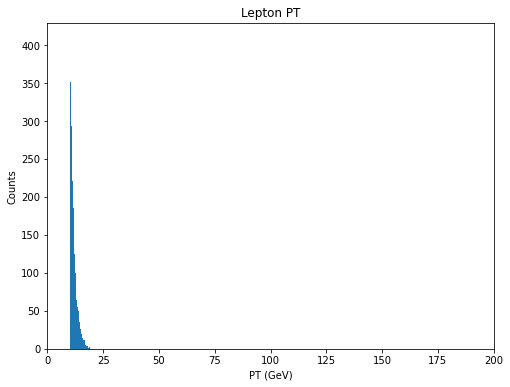

In [25]:
data_inter_A = data[ak.any(data[data['Particle.PID'] == 36]['Particle.Status'] == 2, axis=1)]
# So all these events have an intermediate A with a status = 2
# Note, this is the same as just picking all the events with an A as they can't appear in the initial or final states
# but the way above is a bit more specific. E.g. could do 
# data[ak.any(data['Particle.PID'] == 36, axis=1)]
print(f'The number of events that have an intermediate A = {len(data_inter_A)}')
# Now plot the lepton PT for this data 
lepton_PT(data_inter_A)

# Weirdly these don't seem that bad...
# Even though all these events have both Hs with over 100 PT, it must be the other 
# ones that are messed up

The number of events that have an intermediate A = 4366


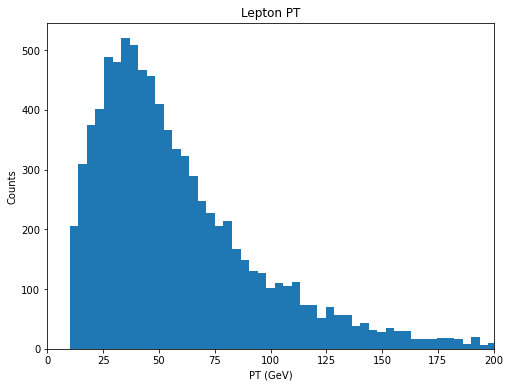

In [26]:
data_inter_Z = data[ak.any(data[data['Particle.PID'] == 23]['Particle.Status'] == 2, axis=1)]
print(f'The number of events that have an intermediate A = {len(data_inter_Z)}')
# Now plot the lepton PT for this data 
lepton_PT(data_inter_Z)

# Weirdly these don't seem that bad...
# Even though all these events have both Hs with over 100 PT, it must be the other 
# ones that are messed up

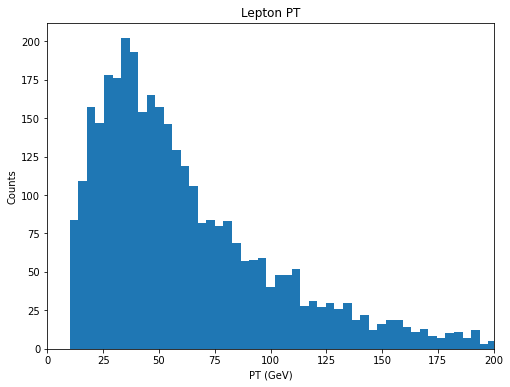

In [27]:
evs_over_100 = data[ak.all(data[data['Particle.PID'] == 35]['Particle.PT'] > 100, axis=1)]
data_no_inter_A = evs_over_100[ak.any(evs_over_100['Particle.PID'] == 23, axis=1)]
# Now lets plot the lepton distribution of this
lepton_PT(data_no_inter_A)

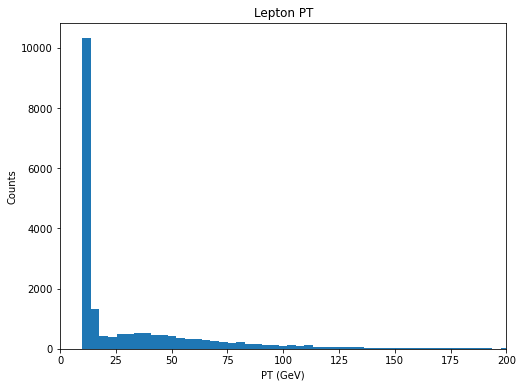

In [28]:
lepton_PT(data)

## Invariant Masses
So for the events that have an on-shell Z, we expect that the invariant mass of the leptons will be roughly equal to the Z mass

The average invariant mass of the leptons with an on-shell A is = 5.085312987573845
The average invariant mass of the leptons with an on-shell Z is = 91.22039151438904


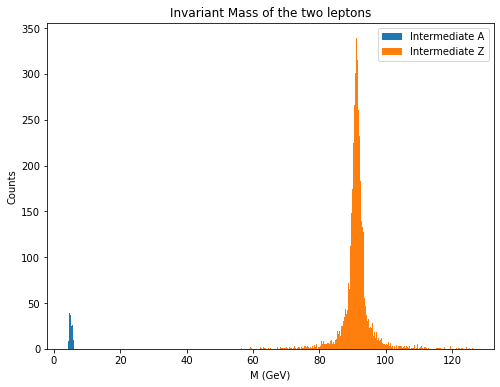

In [29]:
# function that loops over the events and finds invariant mass of the leptons 
def lep_inv_mass(data):
    evs_leptons = data[(abs(data['Particle.PID']) == 11) | (abs(data['Particle.PID']) == 13)]
    inv_mass = []
    for ev in evs_leptons:
        E1, E2 = ev['Particle.E']
        px1, px2 = ev['Particle.Px']
        py1, py2 = ev['Particle.Py']
        pz1, pz2 = ev['Particle.Pz']
        m = np.sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)
        inv_mass.append(m)
    return inv_mass

# First find the ones with intermediate Z
inter_z = data[ak.any(data[data['Particle.PID'] == 23]['Particle.Status'] == 2, axis=1)]
inv_mass_z = lep_inv_mass(inter_z)

# Now do the same for the intermediate A ones
inter_a = data[ak.any(data[data['Particle.PID'] == 36]['Particle.Status'] == 2, axis=1)]
inv_mass_a = lep_inv_mass(inter_a)

# Now plot both of them
nbins = 250
plt.figure(figsize=(8,6))
plt.tight_layout()
#plt.hist(lepton_data['Particle.PT'], bins=nbins, label=f'$\mu={mean:0.2f}$, $\sigma={std:0.2f}$')
plt.hist(inv_mass_a, bins=nbins, label='Intermediate A')
plt.hist(inv_mass_z, bins=nbins, label='Intermediate Z')
plt.title(f'Invariant Mass of the two leptons')
plt.xlabel(f'M (GeV)')
plt.ylabel(f'Counts')
plt.legend()

# This seems like the inter_z ones have way more points, but the reason is that the M_a are 
# much tighter together, so the 250 bins represent a much smaller width of invariant mass
# so each bin has far fewer counts in it 

# The invariant mass for the A is far smaller because it represents the amount of energy 
# of the very off-shell Z that the leptons came from. For BP3 here is very 
# similar to the difference in the masses of the A and the H (~5 GeV)
print(f'The average invariant mass of the leptons with an on-shell A is = {np.mean(inv_mass_a)}')

# And for the ones with a on-shell Z
print(f'The average invariant mass of the leptons with an on-shell Z is = {np.mean(inv_mass_z)}')

In [30]:
# How about we plot the invariant mass of the two leptons combined with an H
# For the on-shell A ones we should get a peak around the A mass
def lepH_inv_mass(data):
    evs_leptons = data[(abs(data['Particle.PID']) == 11) | (abs(data['Particle.PID']) == 13)]
    evs_H = data[data['Particle.PID'] == 35]
    # For if inv_mass is over or below 100
    inv_mass1 = []
    inv_mass2 = []
    for lep_ev, H_ev in zip(evs_leptons, evs_H):
        for i in range(2):
            E1, E2 = lep_ev['Particle.E']
            px1, px2 = lep_ev['Particle.Px']
            py1, py2 = lep_ev['Particle.Py']
            pz1, pz2 = lep_ev['Particle.Pz']
            E3 = H_ev['Particle.E'][i]
            px3 = H_ev['Particle.Px'][i]
            py3 = H_ev['Particle.Py'][i]
            pz3 = H_ev['Particle.Pz'][i]
            m = np.sqrt((E1 + E2 + E3)**2 - (px1 + px2 + px3)**2 - (py1 + py2 + py3)**2 - (pz1 + pz2 + pz3)**2)
            if m < 100:
                inv_mass1.append(m)
            else:
                inv_mass2.append(m)

    return inv_mass1, inv_mass2

# Find this for ones with on-shell A 
inter_a = data[ak.any(data[data['Particle.PID'] == 36]['Particle.Status'] == 2, axis=1)]
inv_mass1, inv_mass2 = lepH_inv_mass(inter_a)

print(f'length of inv_mass1 = {len(inv_mass1)}')
print(f'length of inv_mass2 = {len(inv_mass2)}')

length of inv_mass1 = 5584
length of inv_mass2 = 5584


Text(0, 0.5, 'Counts')

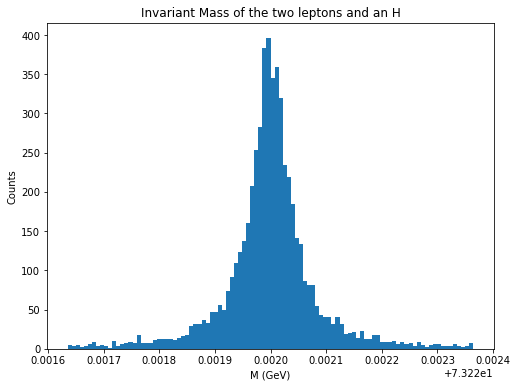

In [31]:
nbins = 100
plt.figure(figsize=(8,6))
plt.tight_layout()

plt.hist(inv_mass1, bins=nbins)
plt.title(f'Invariant Mass of the two leptons and an H')
plt.xlabel(f'M (GeV)')
plt.ylabel(f'Counts')

Text(0, 0.5, 'Counts')

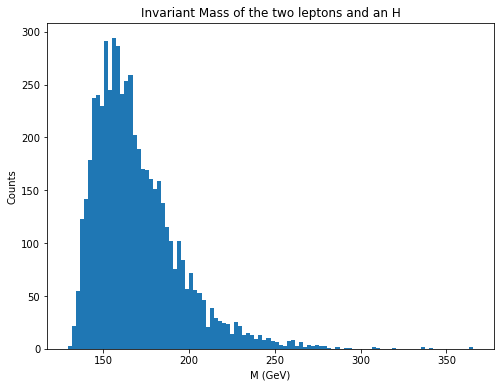

In [32]:
nbins = 100
plt.figure(figsize=(8,6))
plt.tight_layout()

plt.hist(inv_mass2, bins=nbins)
plt.title(f'Invariant Mass of the two leptons and an H')
plt.xlabel(f'M (GeV)')
plt.ylabel(f'Counts')

In [33]:
print(inv_mass_z[:10])
print(inv_mass_a[:10])
print(min(inv_mass_z))
print(min(inv_mass_a))

[92.76272918526614, 94.0689129909634, 91.15690755242133, 91.10100961760952, 94.02225045200586, 90.61742283920589, 79.52471567300859, 74.02361585736982, 83.59929214033168, 92.82570308167914]
[5.766341730305275, 4.9899682334609325, 4.8166937749266685, 5.446483369029016, 4.698207336690336, 5.77951016414948, 4.4468764180651865, 4.670532882538466, 4.424870482246217, 5.28685059575477]
56.21536900024099
4.102442626568261


In [34]:

# Can write a function that takes in the two leptons and outputs the invariant mass 
def m_inv(pairs):
    px = 'Particle.Px'
    py = 'Particle.Py'
    pz = 'Particle.Pz'
    # pairs holds the pairs of all of the leptons
    lep1, lep2 = ak.unzip(pairs)
    E1 = lep1['Particle.E']
    E2 = lep2['Particle.E']
    inv_mass = (E1 + E2)**2 - (lep1[px] + lep2[px])**2 - (lep1[py] + lep2[py])**2 - (lep1[pz] + lep2[pz])**2
    return inv_mass

# Let's find the pairs of the leptons
leps = [11, 13]
events_leptons = inter_z[(abs(inter_z['Particle.PID']) == 11) | (abs(inter_z['Particle.PID']) == 13)]

#pairs = ak.cartesian(inter_z[i])

In [35]:
inv_mass = []
for ev in events_leptons:
    E1, E2 = ev['Particle.E']
    px1, px2 = ev['Particle.Px']
    py1, py2 = ev['Particle.Py']
    pz1, pz2 = ev['Particle.Pz']
    m = np.sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)
    inv_mass.append(m)

Text(0, 0.5, 'Counts')

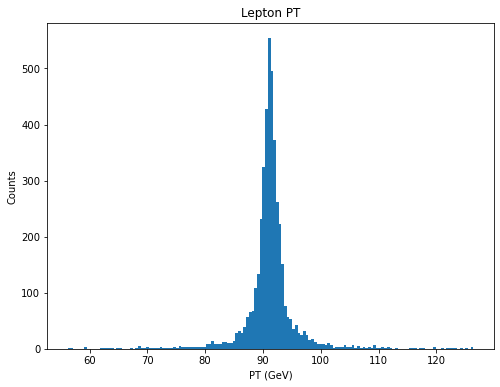

In [36]:

nbins = 150
plt.figure(figsize=(8,6))
plt.tight_layout()
#plt.hist(lepton_data['Particle.PT'], bins=nbins, label=f'$\mu={mean:0.2f}$, $\sigma={std:0.2f}$')
plt.hist(inv_mass, bins=nbins, label='Intermediate Z')
plt.title(f'Lepton PT')
plt.xlabel(f'PT (GeV)')
plt.ylabel(f'Counts')
#plt.xlim((0, 20))

In [37]:
inv_mass = events_

NameError: name 'events_' is not defined